## Trabalho 1 - Fundamentos de Análise de Dados
### Implementação do algoritmo k-NN para k=1, utilizando a distância euclidiana e a distância de Mahalanobis 
#### Dataset: 'Mnist Sign Lang'

In [122]:
# importando as bibliotecas utilizadas no código

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 
import math

### Funções

#### Funções de Manipulação de Dados

In [123]:
arq_train = 'sign_mnist_train.csv'
arq_test = 'sign_mnist_test.csv'

In [130]:
def get_all_df():
    """
    Carrega os conjuntos de dados de treinamento e teste e retorna DataFrames correspondentes.

    Retorna:
    (pandas.DataFrame, pandas.DataFrame): Um par de DataFrames contendo os conjuntos de dados de treinamento e teste, respectivamente.
    """
    df_train = pd.read_csv(arq_train)
    df_test = pd.read_csv(arq_test)
    df_test.drop(df_test.index[0], inplace=True)
    return df_train, df_test

def get_total_df():
    """
    Carrega os conjuntos de dados de treinamento e teste e retorna DataFrames correspondentes.

    Retorna:
    (pandas.DataFrame): Um DataFrames contendo todo o conjuntos de dados de treinamento e de teste
    """
    df_train, df_test = get_all_df()
    concatenated_df = pd.concat([df_train, df_test], axis=0) 
    return concatenated_df

def get_x(tam, arq):
    """
    Seleciona um tamanho específico do dataset e retorna a matriz X de treinamento ou de teste

    Parâmetros:
    tam (int): tamanho da amostra a ser utilizada no experimento
    arq (str): o caminho do arquivo CSV contendo os dados (pode ser o de treino ou o de teste)

    Retorna:
    numpy.ndarray: matriz X de quantidade tam de amostras do dataset.
    """
    df = pd.read_csv(arq)
    df.drop(df.index[tam+1:], inplace=True)
    df.drop(df.index[0], inplace=True)
    df.drop(columns=['label'], inplace=True)
    
    X = np.asarray(df)
    return X

def get_y(tam, arq):
    """
    Retorna:
    numpy.array: vetor Y de quantidade tam de amostras do dataset.
    """
    df = pd.read_csv(arq)
    df.drop(df.index[tam:], inplace=True)
    label = df['label']
    y = np.asarray(label)
    return y

def get_x_y(tam_total):
    """
    Divide o dataset em conjunto de treinamento e teste e retorna os conjuntos X e y 

    Parâmetros:
    tam_total (int): O tamanho total do conjunto de dados.

    Retorna:
    numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray: Conjuntos X_train, X_test, y_train e y_test 
    """
    tam_train = int(0.7 * tam_total)
    tam_test = (tam_total - tam_train)

    X_train = get_x(tam_train, arq_train)
    y_train = get_y(tam_train, arq_train)

    X_test = get_x(tam_test, arq_test)
    y_test = get_y(tam_test, arq_test)

    return X_train, X_test, y_train, y_test

def get_img(index : int = 0) -> None:
    """
    Imprime uma das imagens do dataset (escolhido o de treino arbitrariamente)

    Parâmetros:
    index: posição do vetor da imagem específica no dataset
    """
    df,_ = get_all_df() 
    print(f"Classe dessa imagem: {df['label'].iloc[index]}")

    df.drop(columns=['label'], inplace=True)
    img = np.asarray(df.iloc[index])

    img = img.reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.show()

In [125]:
# print(f"O dataset de treino original tinha {train_ini} amostras, e foi reduzido a {train_fi} amostras. O de teste tinha {test_ini}, e foi reduzido a {test_fi}.")

### Visualização dos Dados
#### Banco de Dados:  [Sign Language - Mnist](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)
Esse banco de dados consiste em vetores que representam imagens de 784 pixels cada que estão na escala RGB (ou seja, casa pixel possui um valor inteiro entre 0 e 255, onde 0 é um pixel branco e 255, um pixel preto), que formam uma imagem de formato 28 x 28

Essas imagens foram retiradas de um banco de dados mais completo, cortadas para aparecerem apenas as mãos, reduzidas a escala de cinza e reformatadas. 


In [126]:
df = get_total_df()

df.head(15)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [127]:
df.shape

(34626, 785)

O conjunto de dados possui uma coluna de label que é a classificação da imagem. A classificação consiste em um número de 0 a 25 (sem '9': J e sem '25': Z, pois os gestos dessas letras requerem movimentação das mãos e não podem ser representados nas imagens), que idenfica aquela imagem como uma letra do alfabeto, sendo 1, a letra 'a', 2, a letra 'b', e assim sucessivamente.

In [128]:
df['label'].head(20)

0      3
1      6
2      2
3      2
4     13
5     16
6      8
7     22
8      3
9      3
10    18
11    10
12    16
13    22
14    20
15    16
16    17
17    13
18    13
19    19
Name: label, dtype: int64

Como a imagem é representada no dataset

In [129]:
df.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202


Exemplo de imagem (no caso, um G)

Classe dessa imagem: 6


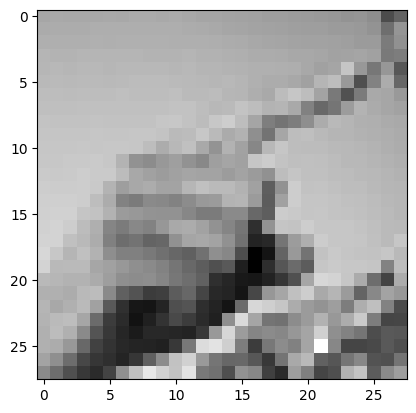

In [131]:
get_img(1)

# aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

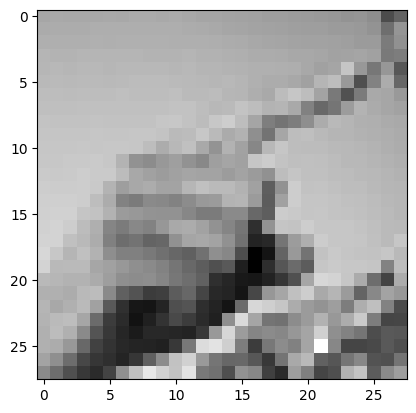

In [ ]:
plt.imshow(pixels, cmap="gray")
plt.show()

### Descrição do processo de redimensionamento de imagens para diminuição do custo computacional com imagem exemplo (letra I em Sign Lang)

In [ ]:
# Definindo a imagem como redimensionada em 14 x 14 para diminuir custo computacional para fazer a predição com KNN 

# size_x = size_x
# size_y = size_y
# pixels = cv2.resize(pixels, (size_x, size_y))

# print(pixels)

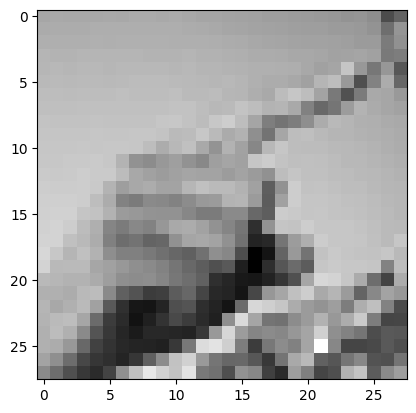

In [ ]:
# visualizando a nova imagem em preto e branco após redimensionamento da matriz para comparação

plt.imshow(pixels, cmap="gray")
plt.show()

In [ ]:
# Transformando a matriz da imagem em NumPy Array novamente

pixels = pixels.flatten() 
print(pixels)

[0.60784314 0.61568627 0.61176471 0.61176471 0.61176471 0.61568627
 0.61176471 0.61960784 0.61960784 0.61568627 0.61960784 0.61176471
 0.60392157 0.60392157 0.6        0.59607843 0.59215686 0.58431373
 0.58431373 0.58039216 0.57647059 0.57254902 0.56470588 0.55686275
 0.56078431 0.54117647 0.36078431 0.42352941 0.61960784 0.62352941
 0.62352941 0.62352941 0.62745098 0.62745098 0.62745098 0.62745098
 0.62745098 0.62745098 0.62745098 0.62352941 0.61960784 0.61568627
 0.60784314 0.60392157 0.6        0.59607843 0.59215686 0.58823529
 0.58431373 0.58431373 0.57647059 0.57647059 0.57254902 0.55686275
 0.45490196 0.56078431 0.63137255 0.63137255 0.63137255 0.63137255
 0.63529412 0.63137255 0.63529412 0.63529412 0.63529412 0.63529412
 0.63137255 0.63137255 0.63137255 0.62745098 0.62352941 0.61960784
 0.61176471 0.60784314 0.60392157 0.6        0.59607843 0.59607843
 0.59215686 0.58823529 0.57647059 0.57647059 0.49019608 0.54901961
 0.64705882 0.64313725 0.64313725 0.64705882 0.64705882 0.6470

#### Calculando a inversa da matriz de covariância

In [ ]:
# Juntando toda a amostra
dataset = np.concatenate((train_matrix, test_matrix))

print(len(dataset))

1000


In [ ]:
# Realizando o procedimento de pré-processamento em todas as imagens do dataset conjugado 

arr1 = dataset[0]
img_example = arr1
pixels = img_example.reshape((28, 28))
pixels = pixels/255
pixels = pixels.flatten() 

processed_images = np.array([pixels])
for index, arr in enumerate(dataset):
    if index == 0:
        continue
    img_example = arr
    pixels = img_example.reshape((28, 28))
    
    pixels = pixels/255
    
    pixels = pixels.flatten() 
    processed_images = np.append(processed_images, [pixels], axis=0)

print(processed_images)



[[0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 [0.82745098 0.82745098 0.83137255 ... 0.87058824 0.89803922 0.63921569]
 ...
 [0.38823529 0.42745098 0.46666667 ... 0.4627451  0.5254902  0.6       ]
 [0.65098039 0.65098039 0.65882353 ... 0.61176471 0.54509804 0.38431373]
 [0.85882353 0.85882353 0.87058824 ... 0.16078431 0.16470588 0.16470588]]


In [ ]:
# Calculando a matriz de covariância do dataset 

cov_X = np.cov(dataset, rowvar=False)
print(cov_X.shape)


(784, 784)


In [ ]:
# Verificando se o posto é máximo para saber se será preciso remover colunas LD
rank = np.linalg.matrix_rank(cov_X)
print(rank)

784


In [ ]:
# Verificando o determinante da matriz de covariância com slogdet, indicada para matrizes de tamanho grande, 
# pois utilizando a função det o resultado não era satisfatório (era sempre 0)
print(cov_X.shape)
det_X = np.linalg.slogdet(cov_X)
print(det_X)

(784, 784)
SlogdetResult(sign=1.0, logabsdet=2610.128596689538)


In [ ]:
inv_X = np.linalg.inv(cov_X)
print(inv_X)

[[ 1.09195808e+01  2.92361783e-01 -1.15039412e-01 ... -2.18249453e-01
   5.76787008e-02 -6.79482987e-02]
 [ 2.92361783e-01  1.40333810e+01 -3.35902537e+00 ...  1.55342090e-01
  -5.08843366e-02 -3.27919316e-03]
 [-1.15039412e-01 -3.35902537e+00  1.34026929e+01 ...  1.31316902e-01
  -2.28209314e-01  3.42670599e-01]
 ...
 [-2.18249453e-01  1.55342090e-01  1.31316902e-01 ...  6.95870122e-01
  -4.27105960e-01  1.46332594e-01]
 [ 5.76787008e-02 -5.08843367e-02 -2.28209314e-01 ... -4.27105960e-01
   5.94379155e-01 -3.09164476e-01]
 [-6.79482987e-02 -3.27919314e-03  3.42670599e-01 ...  1.46332594e-01
  -3.09164476e-01  2.89470336e-01]]


#### Verificando se a matriz inversa realmente é a inversa, multiplicando a inversa pela de covariancia e verificando se o resultado é uma matriz identidade (considerando 10 casas decimais)

In [ ]:
p = np.dot(cov_X, inv_X)
print(p)

[[ 1.00000000e+00 -1.36139988e-11 -1.04733999e-11 ... -8.52651283e-14
  -2.58282284e-12  6.11066753e-13]
 [ 1.06865627e-11  1.00000000e+00  3.89377419e-12 ...  7.10542736e-14
  -1.76214598e-12  7.94031507e-13]
 [ 6.25277607e-13 -1.06581410e-11  1.00000000e+00 ...  1.13686838e-13
   6.89226454e-13  1.10134124e-13]
 ...
 [-1.81898940e-12 -3.29691829e-12  2.55795385e-12 ...  1.00000000e+00
   2.38031816e-12 -3.73034936e-13]
 [ 1.81898940e-12  1.59161573e-12  5.79802872e-12 ...  2.33058017e-12
   1.00000000e+00  4.12114787e-13]
 [-2.38742359e-12 -5.79802872e-12  1.93267624e-12 ...  2.27373675e-13
   1.26476607e-12  1.00000000e+00]]


In [ ]:
def identidade(matrix, tol=1e-10):
  
    if len(matrix) != len(matrix[0]):
        return False
    
    n = len(matrix)
    
    for i in range(n):
        for j in range(n):
            if i == j and not math.isclose(matrix[i][j], 1, abs_tol=tol):
                return False
            elif i != j and not math.isclose(matrix[i][j], 0, abs_tol=tol):
                return False
    
    return True

print(identidade(p))

True


#### Cálculo da Distância de Mahalanobis

In [ ]:
arr1 = train_matrix[0]
img_example = arr1
pixels = img_example.reshape((28, 28))
pixels = pixels/255
pixels = pixels.flatten() 

processed_train = np.array([pixels])
for index, arr in enumerate(train_matrix):
    if index == 0:
        continue
    img_example = arr
    pixels = img_example.reshape((28, 28))
    
    pixels = pixels/255

    
    pixels = pixels.flatten() 
    processed_train = np.append(processed_train, [pixels], axis=0)

print(processed_train)

arr1 = test_matrix[0]
img_example = arr1
pixels = img_example.reshape((28, 28))
pixels = pixels/255
pixels = pixels.flatten() 

processed_test = np.array([pixels])
for index, arr in enumerate(test_matrix):
    if index == 0:
        continue
    img_example = arr
    pixels = img_example.reshape((28, 28))
    
    pixels = pixels/255

    pixels = pixels.flatten() 
    processed_test = np.append(processed_test, [pixels], axis=0)

print(processed_test)


[[0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 [0.82745098 0.82745098 0.83137255 ... 0.87058824 0.89803922 0.63921569]
 ...
 [0.58431373 0.59607843 0.60392157 ... 0.09411765 0.09019608 0.08627451]
 [0.4627451  0.48235294 0.49803922 ... 0.78431373 0.78039216 0.78039216]
 [0.         0.10196078 0.18039216 ... 0.71372549 0.71372549 0.71764706]]
[[0.49411765 0.50196078 0.51372549 ... 0.72156863 0.71372549 0.70588235]
 [0.33333333 0.34509804 0.36078431 ... 0.88235294 0.87843137 0.87058824]
 [0.79607843 0.80392157 0.81176471 ... 0.94117647 0.99215686 1.        ]
 ...
 [0.38823529 0.42745098 0.46666667 ... 0.4627451  0.5254902  0.6       ]
 [0.65098039 0.65098039 0.65882353 ... 0.61176471 0.54509804 0.38431373]
 [0.85882353 0.85882353 0.87058824 ... 0.16078431 0.16470588 0.16470588]]


In [ ]:
%%time

def mahalanobis_distance(x, y, covariance_matrix):
    diff = x - y

    cov_inv = np.linalg.inv(covariance_matrix)
    
    distance = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
    
    return distance


def knn (x_train, x_test, y_train, cov):
    classes_prediction = []
    for test_vector in x_test:
        distances_classes = []
        for index, train_vector in enumerate(x_train):
            dist = mahalanobis_distance(train_vector, test_vector, cov)
            distances_classes.append((dist, y_train[index]))
        distances_classes.sort()
        classes_prediction.append(distances_classes[0][1])
    print(classes_prediction)
    return classes_prediction


prediction = knn(train_matrix, test_matrix, classes_arr, cov_X)

[0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 20, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 21, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 16, 0, 0, 0, 0, 16, 16, 0, 0, 0, 0, 0, 21, 21, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 16, 0, 0, 0, 0, 16, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CPU times: total: 59min 35s
Wall time: 2h 54min 31s


In [ ]:
def data (tam_train, tam_test):
    train = pd.read_csv('sign_mnist_train.csv')

    classes_arr = train['label']

    train.drop(train.index[tam_train:], inplace=True)
    train.drop(train.index[0], inplace=True)
    train.drop(columns=['label'], inplace=True)

    train_matrix = np.asarray(train)

    test = pd.read_csv('sign_mnist_test.csv')

    test_classes_arr = test['label']

    test_ini = tam_train+1
    test_fi = tam_train+tam_test+1
    test.drop(test.index[test_ini:test_fi], inplace=True)
    test.drop(test.index[0], inplace=True)
    test.drop(columns=['label'], inplace=True)

    test_matrix = np.asarray(test)

    return classes_arr, train_matrix, test_classes_arr, test_matrix

def S_matrix (train_matrix, test_matrix):
    dataset = np.concatenate((train_matrix, test_matrix))

    arr1 = dataset[0]
    img_example = arr1
    pixels = img_example.reshape((28, 28))
    pixels = pixels/255
    pixels = pixels.flatten() 

    processed_images = np.array([pixels])
    for index, arr in enumerate(dataset):
        if index == 0:
            continue
        img_example = arr
        pixels = img_example.reshape((28, 28))
        
        pixels = pixels/255
        
        pixels = pixels.flatten() 
        processed_images = np.append(processed_images, [pixels], axis=0)

    cov_X = np.cov(processed_images, rowvar=False)

    rank = np.linalg.matrix_rank(cov_X)

    if (rank != 784):
        return

    else:
        inv_X = np.linalg.inv(cov_X)
        return inv_X

def mahalanobis_distance(x, y, covariance_matrix):
    diff = x - y

    cov_inv = np.linalg.inv(covariance_matrix)
    
    distance = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
    
    return distance


def knn (x_train, x_test, y_train, cov):
    classes_prediction = []
    for test_vector in x_test:
        distances_classes = []
        for index, train_vector in enumerate(x_train):
            dist = mahalanobis_distance(train_vector, test_vector, cov)
            distances_classes.append((dist, y_train[index]))
        distances_classes.sort()
        classes_prediction.append(distances_classes[0][1])
    print(classes_prediction)
    return classes_prediction

def calculo_mahalanobis(train_matrix, test_matrix, classes_arr, cov_X):
    arr1 = train_matrix[0]
    img_example = arr1
    pixels = img_example.reshape((28, 28))
    pixels = pixels/255
    pixels = pixels.flatten() 

    processed_train = np.array([pixels])
    for index, arr in enumerate(train_matrix):
        if index == 0:
            continue
        img_example = arr
        pixels = img_example.reshape((28, 28))
        
        pixels = pixels/255

        
        pixels = pixels.flatten() 
        processed_train = np.append(processed_train, [pixels], axis=0)

    arr1 = test_matrix[0]
    img_example = arr1
    pixels = img_example.reshape((28, 28))
    pixels = pixels/255
    pixels = pixels.flatten() 

    processed_test = np.array([pixels])
    for index, arr in enumerate(test_matrix):
        if index == 0:
            continue
        img_example = arr
        pixels = img_example.reshape((28, 28))
        
        pixels = pixels/255

        pixels = pixels.flatten() 
        processed_test = np.append(processed_test, [pixels], axis=0)

    prediction = knn(processed_train, processed_test, classes_arr, cov_X)
    return prediction


def test_mahalanobis(tam_train, tam_test):
    classes_arr, train_matrix, test_classes_arr, test_matrix = data(tam_train, tam_test)
    S = S_matrix(train_matrix, test_matrix)
    resultado = calculo_mahalanobis(train_matrix, test_matrix, classes_arr, S)
    return resultado


In [ ]:
%%time
resultado_100 = test_mahalanobis(71, 31)
print(resultado_100)


KeyboardInterrupt: 

In [ ]:
%%time
resultado_1000 = test_mahalanobis(701, 301)
print(resultado_1000)


KeyboardInterrupt: 

In [ ]:
%%time
resultado_3000 = test_mahalanobis(2101, 901)
print(resultado_3000)

In [ ]:
DF = pd.DataFrame(prediction) 
DF.to_csv("prediction_mahalanobis.csv")

NameError: name 'pd' is not defined

In [ ]:
def euclidian_distance(x, y):
    len_x = len(x)
    len_y = len(y)
    if (len_x < len_y):
        x.resize(len_y, refcheck=False)
        x[len_x:(len_y-1)] = 0
    elif (len_y < len_x):
        y.resize(len_x, refcheck=False)
        y[len_y:(len_x-1)] = 0
    if( len(x) == len(y)):
        diff = 0
        for index, value_x in enumerate(x):
            diff+=(value_x-y[index])*(value_x-y[index])
        return np.sqrt(diff)
    else:
        raise Exception("Seomething went wrong with euclidian distance")

def knn (x_train, x_test, y_train):
    classes_prediction = []
    for test_vector in x_test:
        distances_classes = []
        for index, train_vector in enumerate(x_train):
            # this euclidian_distance was compared with the euclidian function from scipy
            dist = euclidian_distance(train_vector, test_vector)
            distances_classes.append((dist, y_train[index+1]))
        distances_classes.sort()
        classes_prediction.append(distances_classes[0][1])
    return classes_prediction

In [ ]:
DF = pd.DataFrame(classes_prediction) 
DF.to_csv("prediction_euclidian.csv")

NameError: name 'classes_prediction' is not defined